In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv1D, MaxPooling1D, Flatten, Dropout, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import mat73

In [16]:
feat = pd.read_csv('5features.csv')
feat.head()

,SA,PW,PI,p2p,IPA,Systolic,Diastolic
0,1.765396,23.0,63,62,5.713242,123.038299,66.525670
1,1.754643,22.0,62,63,4.314574,120.986846,65.597632
2,1.687195,21.0,62,61,3.575851,118.349265,66.134917
3,1.663734,19.0,61,61,3.653908,119.570367,66.134917
4,1.700880,23.0,62,63,3.644366,122.354481,67.502552


In [17]:
x = feat.values[:,0:5]
y = feat.values[:,5:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5)

In [18]:
# Dense Model Trained off of 5 Features Extracted from Data
inputs = Input(shape=(5), name='Input')
hidden = Dense(20, name = 'Hidden', activation='linear')(inputs)
hidden1 = Dense(45, name = 'Hidden1', activation='relu')(hidden)
hidden2 = Dense(60, name ='Hidden2', activation='linear')(hidden1)
hidden3 = Dense(75, name = 'Hidden3', activation='relu')(hidden2)
hidden4 = Dense(100, name = 'Hidden4', activation='linear')(hidden3)
hidden5 = Dense(75, name = 'Hidden5', activation = 'relu')(hidden4)
hidden6 = Dense(60, name = 'Hidden6', activation = 'relu')(hidden5)
hidden7 = Dense(50, name = 'Hidden7', activation = 'linear')(hidden6)
hidden8 = Dense(20, name = 'Hidden8', activation = 'relu')(hidden7)
output = Dense(2, name='Output')(hidden8)
model = Model(inputs = inputs, outputs = output, name='Sequential')
print(model.summary())

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 5)]               0         
_________________________________________________________________
Hidden (Dense)               (None, 20)                120       
_________________________________________________________________
Hidden1 (Dense)              (None, 45)                945       
_________________________________________________________________
Hidden2 (Dense)              (None, 60)                2760      
_________________________________________________________________
Hidden3 (Dense)              (None, 75)                4575      
_________________________________________________________________
Hidden4 (Dense)              (None, 100)               7600      
_________________________________________________________________
Hidden5 (Dense)              (None, 75)                7

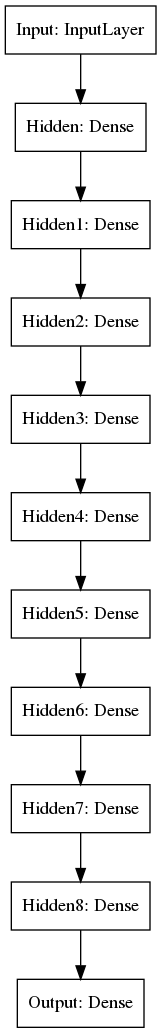

In [19]:
plot_model(model, to_file='denseModel.png')

In [20]:
opt = tf.keras.optimizers.Adam(3e-4)
opt.learning_rate.assign(3e-4)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0003>

In [21]:
model.compile(optimizer=opt, loss="mse")

In [22]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50)

Epoch 1/50
23/23 [==============================] - 0s 6ms/step - loss: 8687.6182 - val_loss: 5189.8535
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 2449.9456 - val_loss: 706.8526
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 283.5901 - val_loss: 143.1443
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 136.4852 - val_loss: 118.2518
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 126.5245 - val_loss: 111.7797
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 123.5413 - val_loss: 112.7494
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 121.9668 - val_loss: 114.4536
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 120.5974 - val_loss: 111.4714
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 118.6170 - val_loss: 109.5153
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 120.52

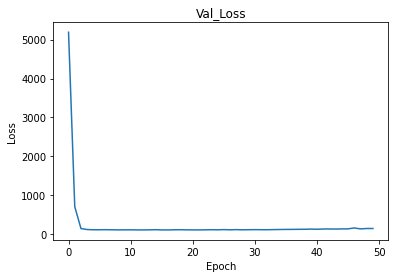

In [23]:
plt.plot(hist.history['val_loss'])
plt.title("Val_Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [24]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 144.6941


144.69407653808594

In [25]:
predict = model.predict(x_train)
print(predict)

[[136.95468   75.13712 ]
 [133.95166   73.507935]
 [136.68008   74.99289 ]
 ...
 [133.0729    72.976875]
 [132.73221   72.807594]
 [136.95354   75.13637 ]]


In [26]:
# Extract PPG data into CSV files
orig = mat73.loadmat(r'data/Part_1.mat')

In [27]:
# Only using Part_1 right now, will expand this to Part 1-3 after the concatenation of everything
ppg = orig['Part_1'][0][0]
abp = orig['Part_1'][0][1]

In [28]:
# Export the current feature list into CSV file # DONT RUN AGAIN ALREADY HAVE FILE
df = pd.DataFrame({'y': ppg, 'ABP': abp})
df.to_csv("smallPPG.csv", index=True, index_label='x')

In [29]:
# Read new CSV file with PPG and ABP
data = pd.read_csv('smallPPG.csv')
len(data)

61000

In [30]:
data

,x,y,ABP
0,0,1.759531,67.062955
1,1,1.718475,69.358628
2,2,1.684262,75.366453
3,3,1.657869,85.037586
4,4,1.637341,96.222885
...,...,...,...
60995,60995,1.771261,74.438415
60996,60996,1.700880,74.536103
60997,60997,1.644184,76.441023
60998,60998,1.600196,81.813875


In [31]:
Scaler = MinMaxScaler()
Scaler.fit_transform(data)

array([[0.00000000e+00, 4.39667807e-01, 1.53709462e-01],
       [1.63937114e-05, 4.29408891e-01, 1.74589072e-01],
       [3.27874227e-05, 4.20859795e-01, 2.29231453e-01],
       ...,
       [9.99967213e-01, 4.10845139e-01, 2.39004887e-01],
       [9.99983606e-01, 3.99853444e-01, 2.87872057e-01],
       [1.00000000e+00, 3.91304348e-01, 3.74944469e-01]])

In [32]:
# PPG to ABP Testing Network
x1 = data.values[:,0:2]
y1 = data.values[:,2:]
x1 = np.expand_dims(x1, axis=2)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)
x_valid1, x_test1, y_valid1, y_test1 = train_test_split(x_test1, y_test1, test_size = 0.5)

In [33]:
optConv = tf.keras.optimizers.Adam(0.001)
optConv.learning_rate.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [34]:
n_timesteps, n_features, n_outputs = x_train1.shape[1], x_train1.shape[2], y_train1.shape[1]

In [18]:
# PPG to ABP Neural Network (Not using, just testing)
inputs = Input(shape=(n_timesteps, n_features), name='InputPPG')
conv1 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(inputs)
pool1 = MaxPooling1D(pool_size = 2)(conv1)
dense1 = Dense(64, activation='relu')(pool1)
conv2 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(dense1)
pool2 = MaxPooling1D(pool_size = 2, padding="same")(conv2)
flatten = Flatten()(pool2)
output = Dense(n_outputs, activation='linear')(flatten)
model1 = Model(inputs = inputs, outputs = output, name='SBP')
print(model1.summary())

Model: "SBP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputPPG (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2, 256)            512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 256)            0         
_________________________________________________________________
dense (Dense)                (None, 1, 64)             16448     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 256)            16640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0       

In [19]:
model1.compile(optimizer=optConv, loss="mse")

In [20]:
model1.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=10)

Epoch 1/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2877.8796 - val_loss: 2506.3333
Epoch 2/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2671.5769 - val_loss: 3433.8042
Epoch 3/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2582.4714 - val_loss: 2799.5439
Epoch 4/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2482.3000 - val_loss: 2184.8726
Epoch 5/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2496.1458 - val_loss: 2212.8186
Epoch 6/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2304.2183 - val_loss: 2549.0774
Epoch 7/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2314.2803 - val_loss: 2201.3582
Epoch 8/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2151.2263 - val_loss: 2020.2720
Epoch 9/10
1335/1335 [==============================] - 4s 3ms/step - loss: 2062.0156 - val_loss: 1851.7772
Epoch 10/10
1335/1335 [=====

In [21]:
model1.evaluate(x_test1, y_test1)

286/286 [==============================] - 0s 2ms/step - loss: 1687.1534


1687.1534423828125

In [23]:
# Differentiate the PPG data (first derivative)
dy = np.diff(ppg)
len(dy)

60999

In [24]:
# Differentiatea the PPG data again (second derivative)
dyy = np.diff(dy)

In [35]:
# Loading the data created in the feature extraction file
ppg_window = np.load('ppg_windows.npy')
sbp = np.load('sbp.npy')
dbp = np.load('dbp.npy')

In [36]:
# Setting the target to SBP from PPG_Window data
x2 = ppg_window
y2 = sbp
x2 = np.expand_dims(x2, axis=2)
y2 = np.expand_dims(y2, axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3)
x_valid2, x_test2, y_valid2, y_test2 = train_test_split(x_test2, y_test2, test_size = 0.5)

In [37]:
optConvSBP = tf.keras.optimizers.Adam(0.001)
optConvSBP.learning_rate.assign(0.00001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-05>

In [38]:
n_timestepsSBP, n_featuresSBP, n_outputsSBP = x_train2.shape[1], x_train2.shape[2], y_train2.shape[1]

In [39]:
sbp_inputs = Input(shape=(n_timestepsSBP, n_featuresSBP), name='InputSBP')
conv1 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(sbp_inputs)
pool1 = MaxPooling1D(pool_size = 2)(conv1)
dense1 = Dense(3, activation='relu')(pool1)
conv2 = Conv1D(input_shape=(n_timestepsSBP, n_outputsSBP), filters = 64, kernel_size = 1, activation = 'relu')(dense1)
pool2 = MaxPooling1D(pool_size = 2)(conv2)
conv3 = Conv1D(input_shape=(n_timestepsSBP, n_outputsSBP), filters = 128, kernel_size = 1, activation = 'relu')(pool2)
pool3 = MaxPooling1D(pool_size = 2)(conv3)
flat2 = Flatten()(pool3)
dense2 = Dense(64, activation='linear')(flat2)
output = Dense(n_outputs, activation='linear')(dense2)
window = Model(inputs = sbp_inputs, outputs = output, name='SBP')
print(window.summary())

Model: "SBP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputSBP (InputLayer)        [(None, 180, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 180, 256)          512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 90, 256)           0         
_________________________________________________________________
dense (Dense)                (None, 90, 3)             771       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 90, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 45, 128)           8320    

In [40]:
window.compile(optimizer=optConvSBP, loss="mse")
wind = window.fit(x_train2, y_train2, validation_data = (x_test2, y_test2), batch_size = 32, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 26ms/step - loss: 17560.4023 - val_loss: 17750.9727
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 17560.1855 - val_loss: 17750.7559
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 17559.9688 - val_loss: 17750.5371
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 17559.7559 - val_loss: 17750.3203
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 17559.5391 - val_loss: 17750.1055
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 17559.3203 - val_loss: 17749.8848
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 17559.1055 - val_loss: 17749.6641
Epoch 8/100
8/8 [==============================] - 0s 16ms/step - loss: 17558.8867 - val_loss: 17749.4473
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 17558.6699 - val_loss: 17749.2285
Epoch 10/100
8/8 [============================

8/8 [==============================] - 0s 16ms/step - loss: 17542.8164 - val_loss: 17733.2754
Epoch 78/100
8/8 [==============================] - 0s 16ms/step - loss: 17542.5684 - val_loss: 17733.0215
Epoch 79/100
8/8 [==============================] - 0s 15ms/step - loss: 17542.3203 - val_loss: 17732.7754
Epoch 80/100
8/8 [==============================] - 0s 15ms/step - loss: 17542.0703 - val_loss: 17732.5254
Epoch 81/100
8/8 [==============================] - 0s 14ms/step - loss: 17541.8203 - val_loss: 17732.2715
Epoch 82/100
8/8 [==============================] - 0s 16ms/step - loss: 17541.5703 - val_loss: 17732.0195
Epoch 83/100
8/8 [==============================] - 0s 16ms/step - loss: 17541.3223 - val_loss: 17731.7695
Epoch 84/100
8/8 [==============================] - 0s 16ms/step - loss: 17541.0723 - val_loss: 17731.5176
Epoch 85/100
8/8 [==============================] - 0s 16ms/step - loss: 17540.8184 - val_loss: 17731.2656
Epoch 86/100
8/8 [==============================] 

In [41]:
window.evaluate(x_test2, y_test2)

2/2 [==============================] - 0s 2ms/step - loss: 17727.4297


17727.4296875

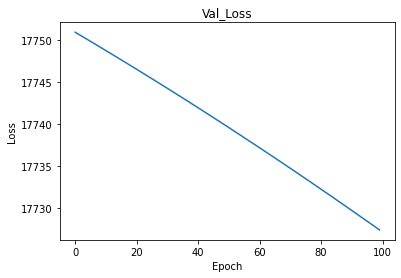

In [42]:
plt.plot(wind.history['val_loss'])
plt.title("Val_Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [107]:
# Creating another neural network with a target of the DBP for the PPG_Windows
x3 = ppg_window
y3 = dbp
x3 = np.expand_dims(x3, axis=2)
y3 = np.expand_dims(y3, axis=1)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.3)
x_valid3, x_test3, y_valid3, y_test3 = train_test_split(x_test3, y_test3, test_size = 0.5)

In [44]:
n_timestepsDBP, n_featuresDBP, n_outputsDBP = x_train2.shape[1], x_train2.shape[2], y_train2.shape[1]

In [45]:
dbp_inputs = Input(shape=(n_timestepsDBP, n_featuresDBP), name='InputDBP')
conv1 = Conv1D(filters = 256, kernel_size = 2, activation = 'relu')(dbp_inputs)
pool1 = MaxPooling1D(pool_size = 2)(conv1)
dense1 = Dense(3, activation='relu')(pool1)
conv2 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters = 64, kernel_size = 1, activation = 'relu')(dense1)
pool2 = MaxPooling1D(pool_size = 2)(conv2)
conv3 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters=128, kernel_size = 1, activation = 'relu')(pool2)
pool3 = MaxPooling1D(pool_size = 2)(conv3)
flat2 = Flatten()(pool3)
dense2 = Dense(64, activation='linear')(flat2)
output1 = Dense(n_outputs, activation='linear', name='output1')(dense2)
window2 = Model(inputs = dbp_inputs, outputs = output1, name='DBP')
print(window2.summary())

Model: "DBP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputDBP (InputLayer)        [(None, 180, 1)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 179, 256)          768       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 89, 256)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 89, 3)             771       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 89, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 44, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 44, 128)           8320    

In [46]:
window2.compile(optimizer=optConvSBP, loss="mse")
wind2 = window2.fit(x_train2, y_train2, validation_data = (x_test2, y_test2), batch_size = 1, epochs=10)

Epoch 1/10
236/236 [==============================] - 1s 4ms/step - loss: 16427.5234 - val_loss: 14708.4404
Epoch 2/10
236/236 [==============================] - 1s 4ms/step - loss: 11658.5791 - val_loss: 8762.5400
Epoch 3/10
236/236 [==============================] - 1s 4ms/step - loss: 5665.3872 - val_loss: 3244.7156
Epoch 4/10
236/236 [==============================] - 1s 4ms/step - loss: 1536.3123 - val_loss: 577.3549
Epoch 5/10
236/236 [==============================] - 1s 4ms/step - loss: 205.6903 - val_loss: 108.5821
Epoch 6/10
236/236 [==============================] - 1s 4ms/step - loss: 62.4987 - val_loss: 77.1877
Epoch 7/10
236/236 [==============================] - 1s 4ms/step - loss: 57.8333 - val_loss: 75.6542
Epoch 8/10
236/236 [==============================] - 1s 4ms/step - loss: 57.6068 - val_loss: 74.0430
Epoch 9/10
236/236 [==============================] - 1s 4ms/step - loss: 57.6895 - val_loss: 74.0739
Epoch 10/10
236/236 [==============================] - 1s 4ms/

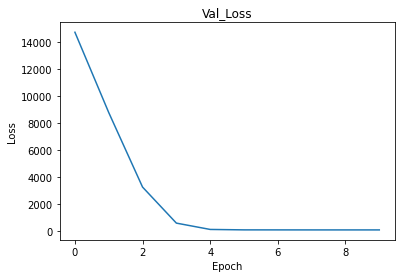

In [47]:
plt.plot(wind2.history['val_loss'])
plt.title("Val_Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [48]:
# Combined Neural Network Dense and Convolutional Neural Network
dense3 = Dense(120, activation='relu')(output1)
dense4 = Dense(120, activation='relu')(output)
combined = concatenate([output1, output])
dense5 = Dense(120, activation='linear')(combined)
concat_out = Dense(2, activation='linear')(dense5)
concat_model = Model(inputs = [dbp_inputs, sbp_inputs], outputs = combined, name="Concat_Model")

In [49]:
concat_model.compile(optimizer=optConvSBP, loss='mse')
concat_model.summary()

Model: "Concat_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputDBP (InputLayer)           [(None, 180, 1)]     0                                            
__________________________________________________________________________________________________
InputSBP (InputLayer)           [(None, 180, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 179, 256)     768         InputDBP[0][0]                   
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 180, 256)     512         InputSBP[0][0]                   
_______________________________________________________________________________________

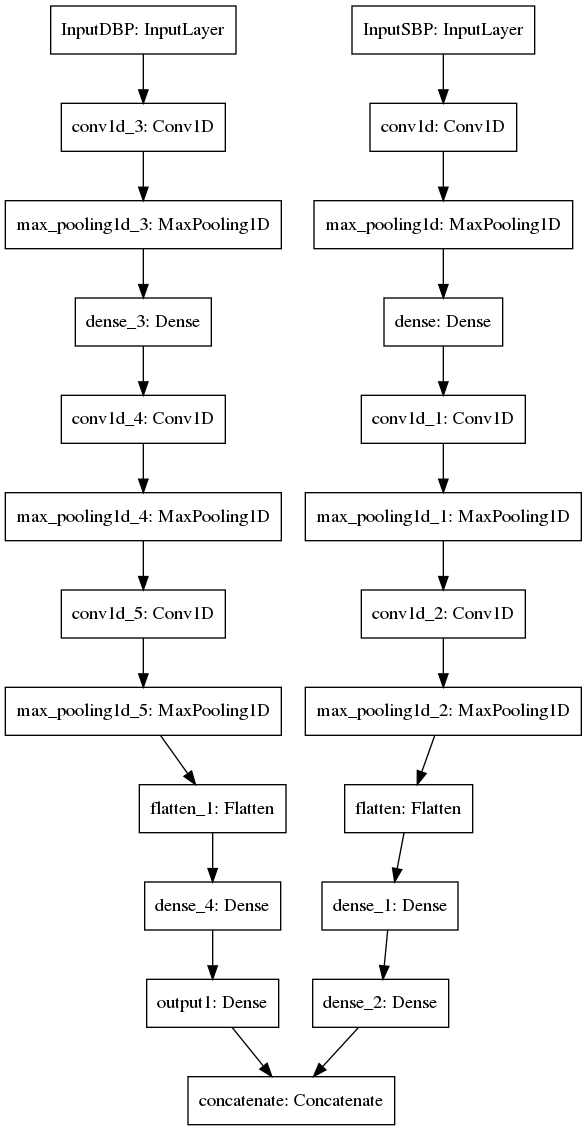

In [50]:
plot_model(concat_model, to_file='concatModel.png')

In [51]:
# Not sure how to fit the models with the 2x the inputs
concat_fit = concat_model.fit(['InputDBP': x_train1, 'InputSBP': x_train2], ["output": y_train1, "output1":y_train2], batch_size = 1, epochs=10)

SyntaxError: invalid syntax (<ipython-input-51-4dcd068eb50c>, line 1)